# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset to python environment
wine=pd.read_csv('Wine.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 13)

In [5]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
%whos

Variable   Type         Data/Info
---------------------------------
np         module       <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'D:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'D<...>s\\seaborn\\__init__.py'>
warnings   module       <module 'warnings' from '<...>older\\lib\\warnings.py'>
wine       DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]


In [9]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values present in the data set

<AxesSubplot:>

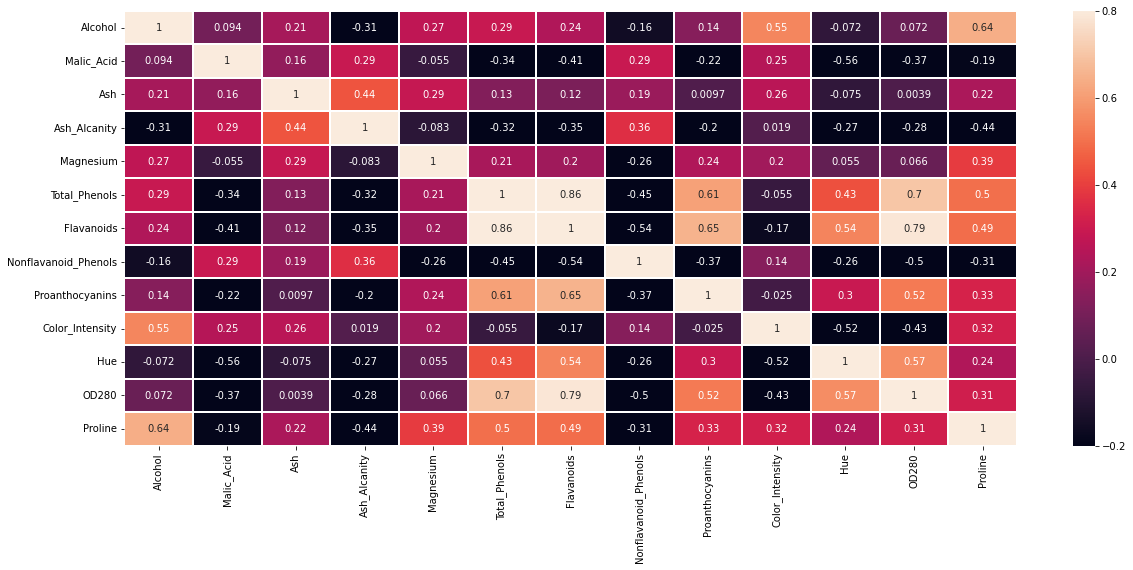

In [11]:
# Correlation Analysis 
corrmatrix=wine.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=0.2)

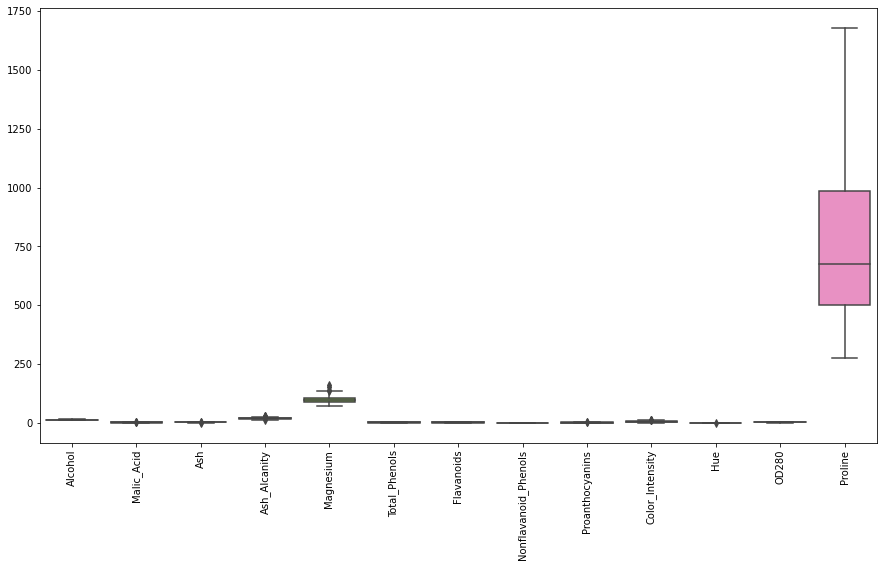

In [12]:
# Boxplot of the entire dataset
plt.figure(figsize=(15,8))
sns.boxplot(data= wine)
plt.xticks(rotation = 90);

In [13]:
# Creating a dupicate file
wine_copy=wine.copy()
wine_copy.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<AxesSubplot:>

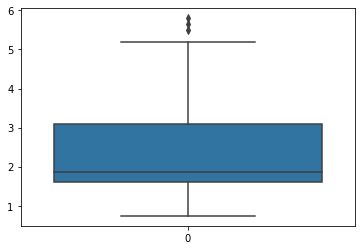

In [14]:
# Checking for outliers in the column 'Malic_Acid'
sns.boxplot(data=wine_copy['Malic_Acid'])

In [15]:
# Handling outliers in the column 'Malic_Acid'
Q1=np.percentile(wine_copy['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Malic_Acid'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Malic_Acid']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

Q1 =  1.605
Q2 =  1.8650000000000002
Q3 =  3.065

Lower limit =  -0.585
Upper limit =  5.255

The outliers are :  [5.8, 5.51, 5.65]


In [16]:
ind1 = wine_copy[(wine_copy['Malic_Acid'] < low_limit) | (wine_copy['Malic_Acid'] > up_limit)].index
wine_copy.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [17]:
wine_copy.drop(ind1,inplace=True)
wine_copy

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# After removing  outliers in the column 'Malic_Acid'
sns.boxplot(data=wine_copy['Malic_Acid'])

In [ ]:
# Checking for outliers in the column 'Ash'
sns.boxplot(data=wine_copy['Ash'])

In [ ]:
# Handling outliers in the column 'Ash'
Q1=np.percentile(wine_copy['Ash'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Ash'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Ash'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Ash']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

In [ ]:
ind1 = wine_copy[(wine_copy['Ash'] < low_limit) | (wine_copy['Ash'] > up_limit)].index
wine_copy.loc[ind1].index

In [ ]:
wine_copy.drop(ind1,inplace=True)
wine_copy

In [ ]:
# After removing  outliers in the column 'Ash'
sns.boxplot(data=wine_copy['Ash'])

In [ ]:
# Checking for outliers in the column 'Ash_Alcanity'
sns.boxplot(data=wine_copy['Ash_Alcanity'])

In [ ]:
# Handling outliers in the column 'Ash_Alcanity'
Q1=np.percentile(wine_copy['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Ash_Alcanity'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Ash_Alcanity']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

In [ ]:
ind1 = wine_copy[(wine_copy['Ash_Alcanity'] < low_limit) | (wine_copy['Ash_Alcanity'] > up_limit)].index
wine_copy.loc[ind1].index

In [ ]:
wine_copy.drop(ind1,inplace=True)
wine_copy

In [ ]:
# After removing  outliers in the column 'Ash_Alcanity'
sns.boxplot(data=wine_copy['Ash_Alcanity'])

In [ ]:
# Checking for outliers in the column 'Magnesium'
sns.boxplot(data=wine_copy['Magnesium'])

In [ ]:
# Handling outliers in the column 'Magnesium'
Q1=np.percentile(wine_copy['Magnesium'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Magnesium'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Magnesium'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Magnesium']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

In [ ]:
ind1 = wine_copy[(wine_copy['Magnesium'] < low_limit) | (wine_copy['Magnesium'] > up_limit)].index
wine_copy.loc[ind1].index

In [ ]:
wine_copy.drop(ind1,inplace=True)
wine_copy

In [ ]:
# After removing  outliers in the column 'Magnesium'
sns.boxplot(data=wine_copy['Magnesium'])

In [ ]:
# Checking for outliers in the column 'Proanthocyanins'
sns.boxplot(data=wine_copy['Proanthocyanins'])

In [ ]:
# Handling outliers in the column 'Proanthocyanins'
Q1=np.percentile(wine_copy['Proanthocyanins'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Proanthocyanins'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Proanthocyanins'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Proanthocyanins']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

In [ ]:
ind1 = wine_copy[(wine_copy['Proanthocyanins'] < low_limit) | (wine_copy['Proanthocyanins'] > up_limit)].index
wine_copy.loc[ind1].index

In [ ]:
wine_copy.drop(ind1,inplace=True)
wine_copy

In [ ]:
# After removing  outliers in the column 'Proanthocyanins'
sns.boxplot(data=wine_copy['Proanthocyanins'])

In [ ]:
# Checking for outliers in the column 'Color_Intensity'
sns.boxplot(data=wine_copy['Color_Intensity'])

In [ ]:
# Handling outliers in the column 'Color_Intensity'
Q1=np.percentile(wine_copy['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Color_Intensity'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Color_Intensity']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

In [ ]:
ind1 = wine_copy[(wine_copy['Color_Intensity'] < low_limit) | (wine_copy['Color_Intensity'] > up_limit)].index
wine_copy.loc[ind1].index

In [ ]:
wine_copy.drop(ind1,inplace=True)
wine_copy

In [ ]:
# After removing  outliers in the column 'Color_Intensity'
sns.boxplot(data=wine_copy['Color_Intensity'])

In [ ]:
# Checking for outliers in the column 'Hue'
sns.boxplot(data=wine_copy['Hue'])

In [ ]:
# Handling outliers in the column 'Hue'
Q1=np.percentile(wine_copy['Hue'],25,interpolation='midpoint')
Q2=np.percentile(wine_copy['Hue'],50,interpolation='midpoint')
Q3=np.percentile(wine_copy['Hue'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in wine_copy['Hue']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

In [ ]:
ind1 = wine_copy[(wine_copy['Hue'] < low_limit) | (wine_copy['Hue'] > up_limit)].index
wine_copy.loc[ind1].index

In [ ]:
wine_copy.drop(ind1,inplace=True)
wine_copy

In [ ]:
# After removing  outliers in the column 'Hue'
sns.boxplot(data=wine_copy['Hue'])

Now all the outliers are removed from the dataset

In [ ]:
wine_copy.shape

In [ ]:
wine_copy.describe()

In [ ]:
# Creating 2 duplicates of the outlier removed data.

scaled_wine = wine_copy.copy()

norm_wine = wine_copy.copy()

In [ ]:
# Standard scaling the dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_wine)
pd.DataFrame(scaled_data).describe()

## KMeans Model

In [ ]:
# Finding optimum number of clusters using scaled data

from sklearn.cluster import KMeans
inertia = []
for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

In [ ]:
plt.plot(range(1,6),inertia,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.show()

From the elbow method, the optimum number of clusters =3

In [ ]:
# Creating KMeans model for scaled data
kmeans_sc = KMeans(n_clusters=3)
kmeans_sc.fit(scaled_data)
label_sc = kmeans_sc.predict(scaled_data)
print(label_sc)

In [ ]:
# Checking the sihouette score for scaled kmeans model
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(scaled_data, label_sc)}')

In [ ]:
# Normalizing the dataset
from sklearn.preprocessing import Normalizer
norm=Normalizer()
norm_data = norm.fit_transform(norm_wine)
pd.DataFrame(norm_data).describe()

In [ ]:
# Finding optimum number of clusters using normalized data
inertia_n = []
for k in range(1,6):
    model_n = KMeans(n_clusters=k)
    model_n.fit(norm_data)
    inertia_n.append(model_n.inertia_)
    
print(inertia_n)

plt.plot(range(1,6),inertia_n,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")

Here also the optimum number of clusters =3

In [ ]:
# Creating KMeans model for normalized data
kmeans_no = KMeans(n_clusters=3)
kmeans_no.fit(norm_data)
label_no = kmeans_no.predict(norm_data)
print(label_no)

In [ ]:
# Checking the sihouette score for normalized kmeans model
print(f'Silhouette Score(n=3): {silhouette_score(norm_data, label_no)}')

We observe that for normalized data with n=3, we get better Silhouette score(0.5348..)

Hence we can use the Normalized data with 3 Clusters for our KMeans Model.

In [ ]:
# Performing PCA
from sklearn.decomposition import PCA
pca=PCA(0.99)
pca.fit(norm_data)
wine_pca=pca.transform(norm_data)
wine_pca.shape

The feature count is reduced to 2 by performing PCA

In [ ]:
kmeans_pca_n = KMeans(n_clusters=3)
kmeans_pca_n.fit(wine_pca)
label_pca_n = kmeans_pca_n.predict(wine_pca)

print(label_pca_n)

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(wine_pca, label_pca_n)}')

Now it is seen that after doing PCA the Silhoutte sscore of the KMeans model is improved to 0.547624..

## Agglomerative Hierarchical Model

In [ ]:
# Dendrogram to find the number of clusters using scaled data
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(scaled_data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(13,0,5000,colors='r',linestyles='dashed')
plt.show()

Here we can take the optimum number of clusters =3

In [ ]:
# Dendrogram to find the number of clusters using normalized data
linked=linkage(norm_data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(0.5,0,5000,colors='r',linestyles='dashed')
plt.show()

Here optimum number of clusters=2

In [ ]:
# Creating AHC Model for scaled data
from sklearn.cluster import AgglomerativeClustering
cluster_sc = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage="ward")
ahclabel_sc = cluster_sc.fit_predict(scaled_data)
print(ahclabel_sc)

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(scaled_data, ahclabel_sc)}')

In [ ]:
# Creating AHC Model for normalized data
cluster_no = AgglomerativeClustering(n_clusters = 2, affinity="euclidean", linkage="ward")
ahclabel_no = cluster_no.fit_predict(norm_data)
print(ahclabel_no)

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(norm_data, ahclabel_no)}')

We observe that for normalized data with n=2, we get better Silhouette score(0.557289..)

Hence we can use the Normalized data with 2 Clusters for the AHC Model.

In [ ]:
# Performing PCA for AHC model
ahc_pca_n = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
ahclabel_pca_n = ahc_pca_n.fit_predict(wine_pca)
print(ahclabel_pca_n)

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(wine_pca, ahclabel_pca_n)}')

After performing PCA for the normalized AHC model, we can observe a very minor increase in the Silhouette Score  
(Increased from 0.5572 to 0.5585)

## Conclusion

The Silhouette score for the Models were as given below :

KMeans Model (Scaled and n=3) = 0.301

KMeans Model (Normalized and n=3) = 0.535

KMeans Model (After PCA and n = 3) = 0.548,

AHC Model (Scaled and n=3) = 0.296

AHC Model (Normalized and n=2) = 0.557

AHC Model (After PCA and n = 2 ) = 0.559

After comparing the models we can coclude that the Normalized Agglomerative Hierarchical Clustering model (n=2 and after PCA ) is giving a 
slightly higher performance score  than the Normalized Kmeans model (n=3 and after PCA)